In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fuel = pd.read_csv("fuel_econ.csv")
fuel.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## Quantitative & quantitative variables

### Scatterplots

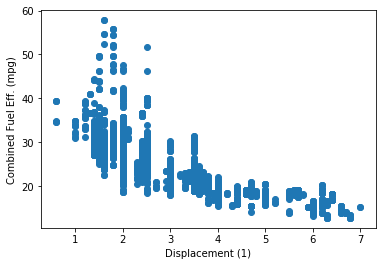

In [5]:
plt.scatter(data = fuel, x = 'displ', y = 'comb')
plt.xlabel("Displacement (1)")
plt.ylabel("Combined Fuel Eff. (mpg)");

Alternative: seaborn

/home/natasha/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


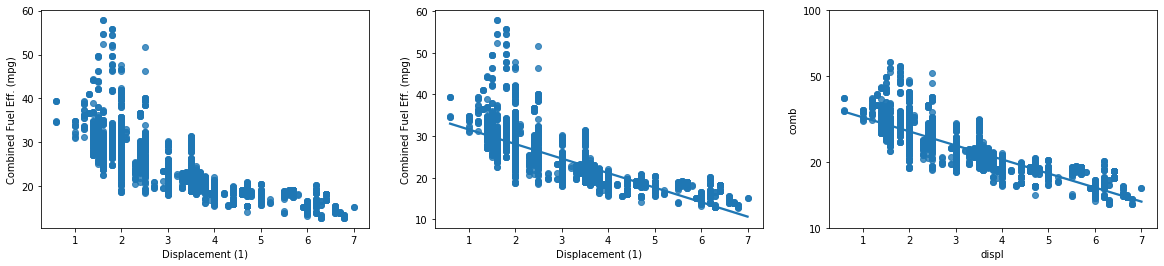

In [18]:
plt.figure(figsize=[20,4])

plt.subplot(1,3,1)
sns.regplot(data = fuel, x = 'displ', y = 'comb', fit_reg = False)
plt.xlabel("Displacement (1)")
plt.ylabel("Combined Fuel Eff. (mpg)");

plt.subplot(1,3,2)
sns.regplot(data = fuel, x = 'displ', y = 'comb')
plt.xlabel("Displacement (1)")
plt.ylabel("Combined Fuel Eff. (mpg)");

plt.subplot(1,3,3)

def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(fuel['displ'], fuel['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

#### Overplotting, transparency, jitter

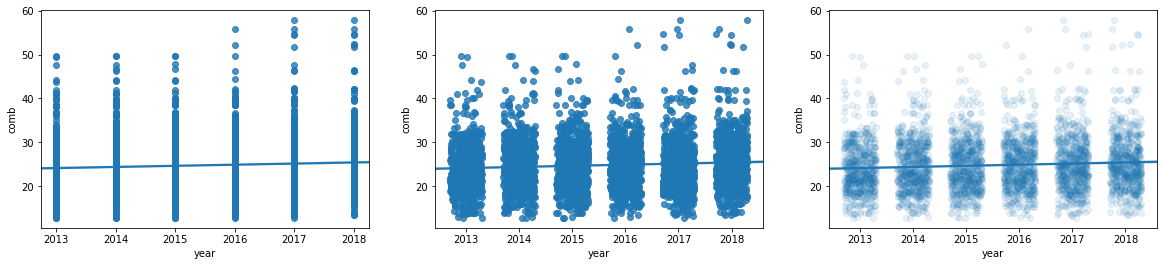

In [23]:
##########################################
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 4])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 3, 1)
sns.regplot(data = fuel, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT IN THE MIDLE - SCATTER PLOT WITH JITTER
plt.subplot(1, 3, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sns.regplot(data = fuel, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER AND TRANSPARENCY
plt.subplot(1, 3, 3)

# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sns.regplot(data = fuel, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/10});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
#plt.scatter(data = fuel, x = 'year', y = 'comb', alpha=1/20);

### Heatmaps

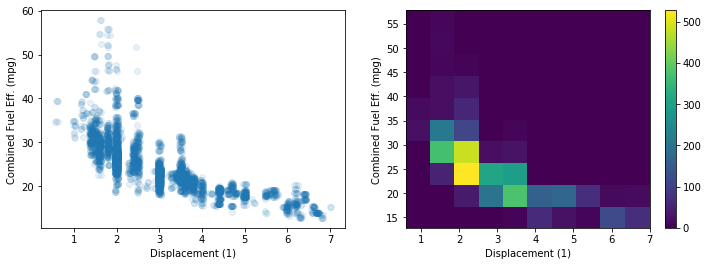

In [25]:
plt.figure(figsize = [12, 4])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sns.regplot(data = fuel, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

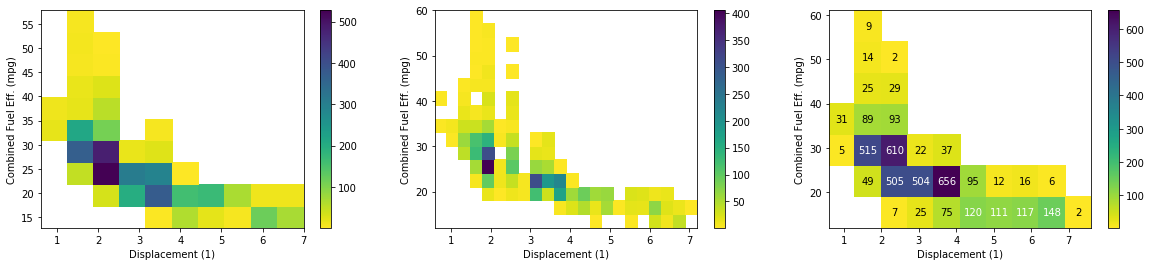

In [29]:
plt.figure(figsize = [20, 4])

plt.subplot(1,3,1)
# PLOT ON LEFT
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = fuel, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

plt.subplot(1,3,2)
# PLOT IN THE MIDDLE
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.

plt.subplot(1,3,3)
# PLOT ON RIGHT
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

## Qualitative & quantitative variables

### Violin plots

In [32]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel['VClass'] = fuel['VClass'].astype(vclasses)

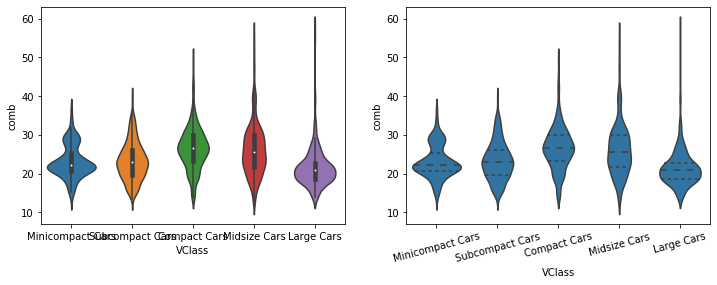

In [49]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1)
sns.violinplot(data=fuel, x='VClass', y='comb');

plt.subplot(1,2,2)

base_color = sns.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sns.violinplot(data=fuel, x='VClass', y='comb', color=base_color, inner="quartile")
plt.xticks(rotation=15);

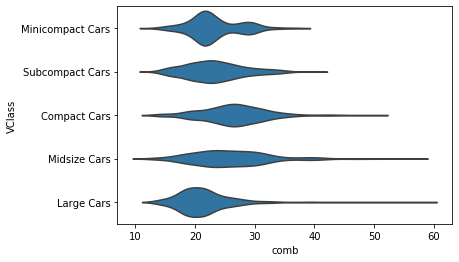

In [36]:
sns.violinplot(data=fuel, y='VClass', x='comb', color=base_color, inner=None);

### Boxplot

(6.966470319355814, 63.09321945242605)

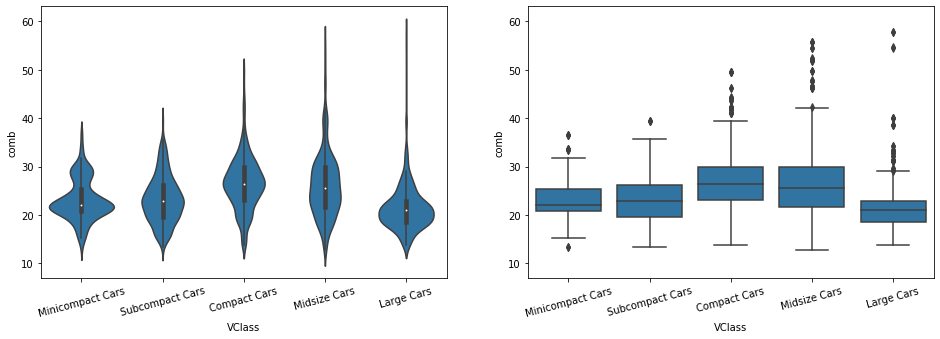

In [41]:
# TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sns.violinplot(data=fuel, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=fuel, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

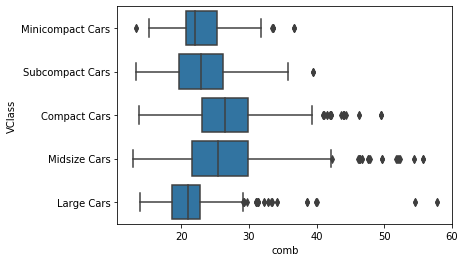

In [43]:
sns.boxplot(data=fuel, y='VClass', x='comb', color=base_color);

## Qualitative & qualitative variables

### Clustered bar charts

In [52]:
fuel['trans_type'] = fuel['trans'].apply(lambda x:x.split()[0])
fuel.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


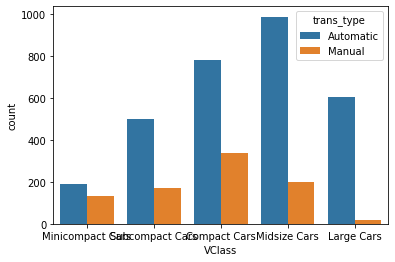

In [55]:
sns.countplot(data = fuel, x = 'VClass', hue = 'trans_type');

### Heat map

In [57]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
t_counts = fuel.groupby(['VClass', 'trans_type']).size()
t_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [58]:
# Use Series.reset_index() to convert a series into a dataframe object
t_counts = t_counts.reset_index(name='count')
t_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [59]:
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
t_counts = t_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
t_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


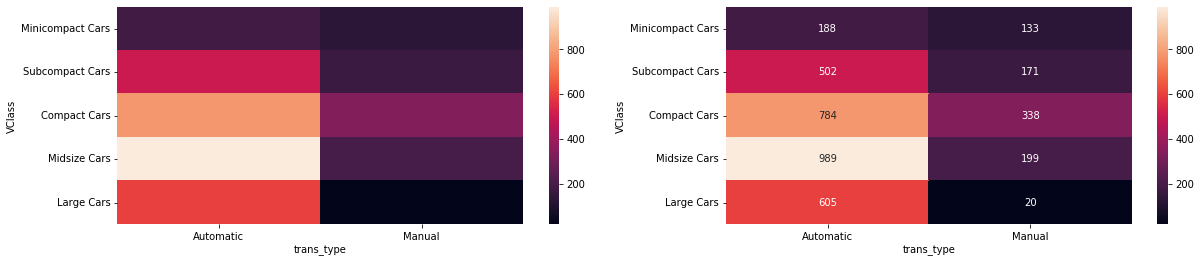

In [63]:
plt.figure(figsize=[20,4])
plt.subplot(1,2,1)
sns.heatmap(t_counts);

plt.subplot(1,2,2)
sns.heatmap(t_counts, annot = True, fmt = 'd');

## Extra plots

### Faceting

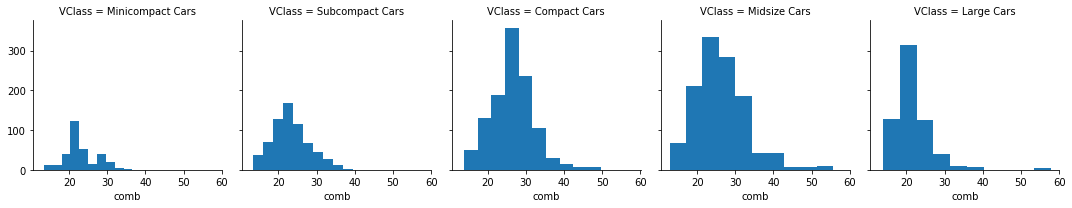

In [66]:
# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = fuel, col = 'VClass')
g.map(plt.hist, "comb");

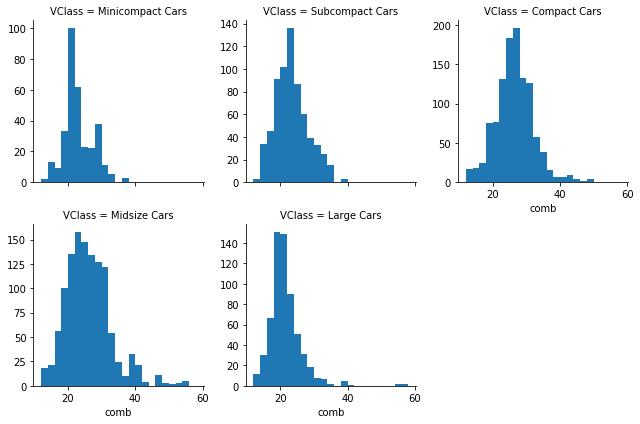

In [67]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sns.FacetGrid(data = fuel, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

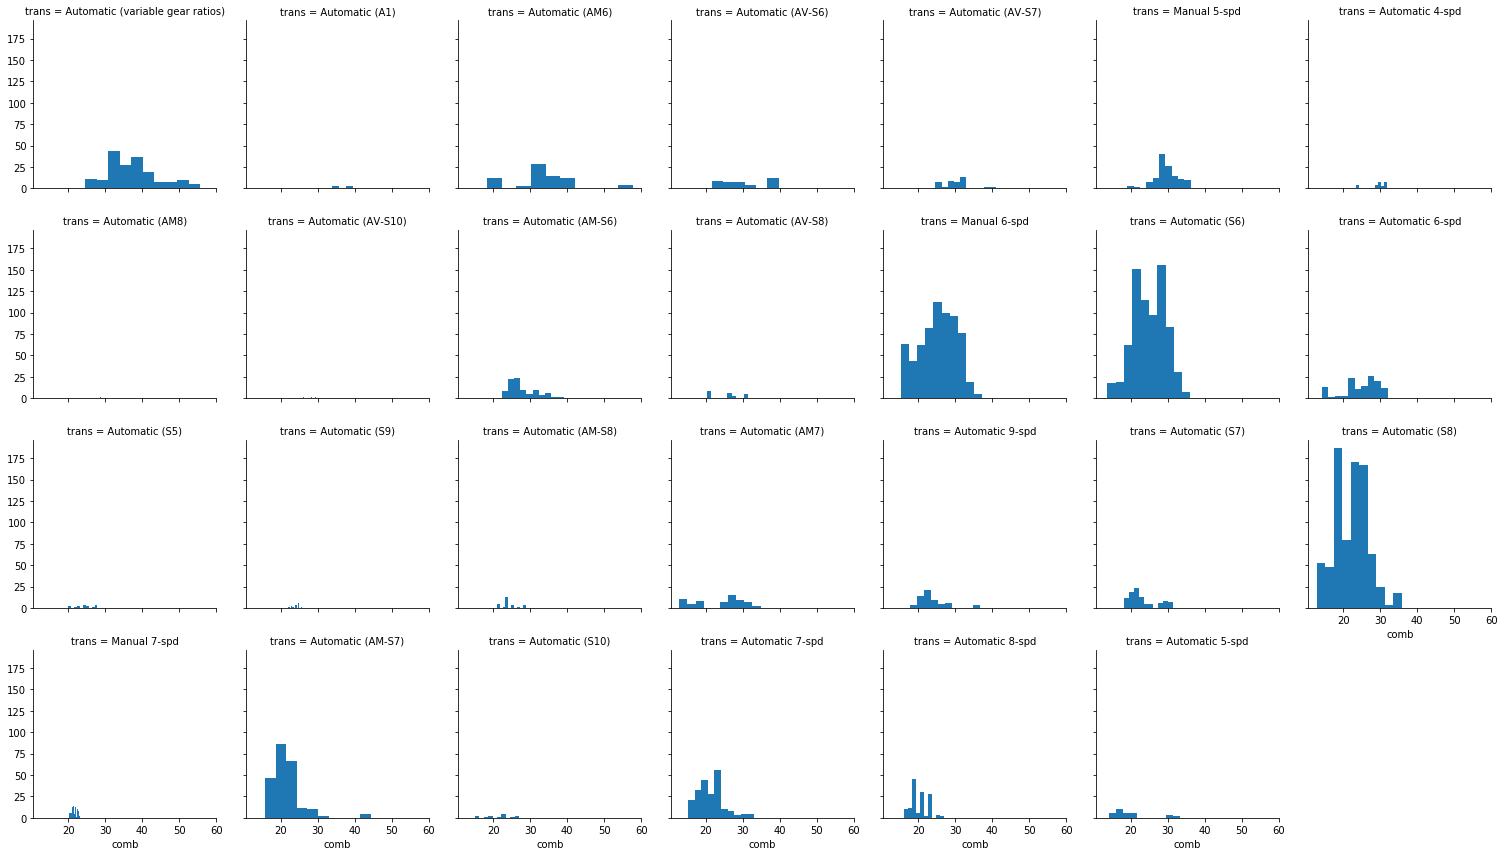

In [68]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sns.FacetGrid(data = fuel, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')

### Adapted bar charts

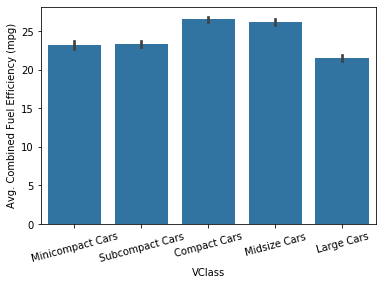

In [70]:
sns.barplot(data=fuel, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

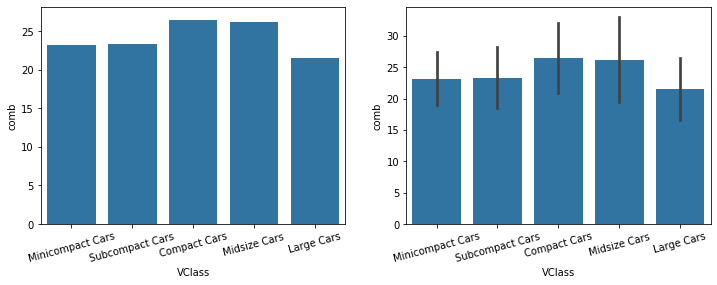

In [74]:
plt.figure(figsize=[12,4])
# Try these additional arguments
plt.subplot(1,2,1)
sns.barplot(data=fuel, x='VClass', y='comb', color=base_color, errwidth=0)
plt.xticks(rotation=15)

plt.subplot(1,2,2)
sns.barplot(data=fuel, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=15);

### Point plot

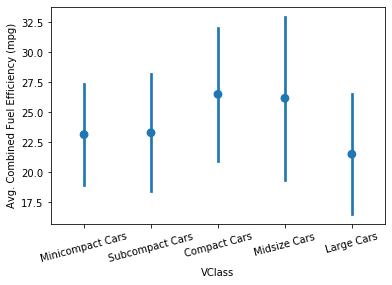

In [76]:
sns.pointplot(data=fuel, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

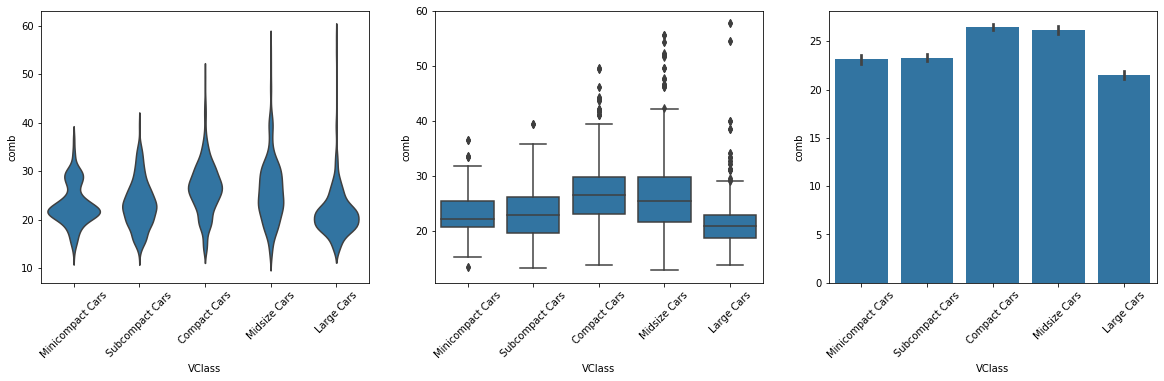

In [77]:
plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 3, 1)
sns.violinplot(data=fuel, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=fuel, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sns.barplot(data=fuel, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

### Time-series plot

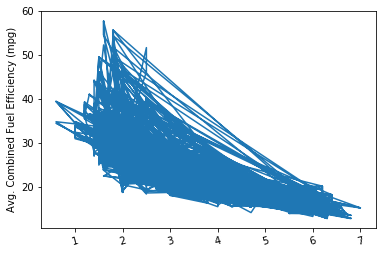

In [78]:
plt.errorbar(data=fuel, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

In [79]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

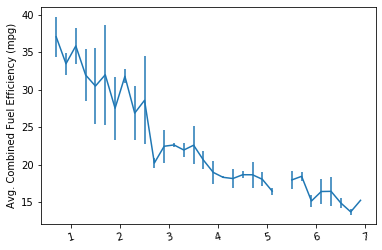

In [81]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel['comb'].groupby(displ_binned).mean()
comb_std = fuel['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');